# Jupyter Notebook to Analyize and Visualize BSR Disease Model csv data


# 1. Importing Packages Required (No input required, just run)

In [1]:
import pandas as pd #<- package used to import and organize data
import numpy as np #<- package used to import and organize data
import seaborn as sns #<- package used to plot graphs
from matplotlib import pyplot as plt #<- package used to plot graphs
import os #<- package used to work with system filepaths
from ipywidgets import widgets #<- widget tool to generate button
from IPython.display import display #<- displays button
# from tkinter import Tk, filedialog #<- Tkinter is a GUI package
from tqdm.notebook import tqdm
from ipyfilechooser import FileChooser
# import dask.dataframe as dd
import pingouin as pg
import random
pd.set_option('display.max_columns', 50)
print("done step 1")

done step 1


# 2. Pick filepath (just run and click button)

Run the following cell and clicke the button 'Select Folder' to pick a filepath.

## Important: Later on, this script uses the total file path for each file to import and group data. That means if your folder has whatever your strain is named, the script will not work.

(ex. if your folder has "N2" in it this script sees all files inside this folder as having the "N2" search key)

## An easy fix is to just rename your folder to something else (make your strains lower-case, or just have the date)

In [2]:
starting_directory='/Users/Joseph/Desktop/'
chooser=FileChooser(starting_directory)
display(chooser)

FileChooser(path='/Users/Joseph/Desktop', filename='', title='', show_hidden=False, select_desc='Select', chan…

In [64]:
folder_path=chooser.selected_path
print(folder_path)

/Users/Joseph/Desktop/BSR_Screen/Disease_Model_Controls


In [65]:
BSR_Data = pd.read_csv(chooser.selected).drop(columns=['Unnamed: 0'])

In [21]:
BSR_Data['Allele'] = BSR_Data['Genotype'].str.split(pat='(', expand=True)[1]
BSR_Data['Allele'] = BSR_Data['Allele'].str.split(pat=')', expand=True)[0]
print(BSR_Data.head(5))

        Group Genotype Treatment  plate_id      date  worm  time_bin  \
0  N2_OffFood       N2   OffFood     40154  20240719    25     336.0   
1  N2_OffFood       N2   OffFood     40154  20240719    36     322.0   
2  N2_OffFood       N2   OffFood     40154  20240719    42     378.5   
3  N2_OffFood       N2   OffFood     40154  20240719    44     397.0   
4  N2_OffFood       N2   OffFood     40154  20240719    45     368.5   

         time     speed          x          y  angularspeed  pathlength  \
0  335.501258  0.245395  37.044346  23.272003     13.914803    6.605704   
1  321.493852  0.200734  26.962151  47.312079     17.537243   10.244205   
2  378.006203  0.228473  22.277368  35.974185     20.002882    4.241047   
3  396.524982  0.184413  23.446122  38.335067     13.879478   -0.733685   
4  367.998291  0.237649  34.785385  42.924100     15.419695    4.443233   

        kink      bias      curve       dir      crab    length   midline  \
0  50.992052  0.972155  39.869297  0.00

In [66]:
BSR_Data

,Group,Genotype,Treatment,plate_id,date,worm,time_bin,time,speed,x,y,angularspeed,pathlength,kink,bias,curve,dir,crab,length,midline,width,morphwidth,area
0,N2_OffFood,N2,OffFood,40154,20240719,25,336.0,335.501258,0.245395,37.044346,23.272003,13.914803,6.605704,50.992052,0.972155,39.869297,0.007257,0.028444,0.939793,1.216917,0.305492,0.135738,0.147547
1,N2_OffFood,N2,OffFood,40154,20240719,36,322.0,321.493852,0.200734,26.962151,47.312079,17.537243,10.244205,64.081827,0.287605,38.569931,0.007101,0.031187,0.852394,1.081147,0.288791,0.137864,0.126605
2,N2_OffFood,N2,OffFood,40154,20240719,42,378.5,378.006203,0.228473,22.277368,35.974185,20.002882,4.241047,55.149340,0.920882,36.899841,0.018032,0.027917,0.888361,1.144950,0.298375,0.126361,0.127636
3,N2_OffFood,N2,OffFood,40154,20240719,44,397.0,396.524982,0.184413,23.446122,38.335067,13.879478,-0.733685,68.792069,-0.683298,34.809800,0.007075,0.029776,0.790220,0.981565,0.267419,0.145313,0.125215
4,N2_OffFood,N2,OffFood,40154,20240719,45,368.5,367.998291,0.237649,34.785385,42.924100,15.419695,4.443233,42.640759,0.989474,35.097967,0.000598,0.029738,0.950478,1.125303,0.252053,0.123414,0.123110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,dat1-hSNCA(hSNCA)_OnFood,dat-1::hSNCA,OnFood,120347,20240719,630,392.5,392.018094,0.237920,42.967859,26.960003,24.572321,1.982640,50.627480,1.000000,35.894816,0.002000,0.038095,0.747072,0.965233,0.284149,0.109986,0.099075
1315,dat1-hSNCA(hSNCA)_OnFood,dat-1::hSNCA,OnFood,120347,20240719,636,395.0,394.524165,0.160218,22.822113,40.463838,27.858207,0.839443,75.245328,0.909091,32.062374,0.003874,0.016910,0.588239,0.767220,0.227141,0.095797,0.069295
1316,dat1-hSNCA(hSNCA)_OnFood,dat-1::hSNCA,OnFood,120347,20240719,637,307.0,306.494806,0.007395,29.974774,30.317465,1.388519,12.501000,50.594074,0.000000,26.293426,0.000000,0.002549,0.633073,0.764213,0.217450,0.082887,0.069991
1317,dat1-hSNCA(hSNCA)_OnFood,dat-1::hSNCA,OnFood,120347,20240719,638,395.5,395.010601,0.196648,31.355250,36.705996,29.177361,0.974688,69.760774,1.000000,34.957778,0.003963,0.026941,0.625342,0.828971,0.233807,0.101477,0.081250


In [67]:
print(len(BSR_Data['Genotype'].unique()))

2


In [ ]:
BSR_Data1=pd.read_csv('/Users/Joseph/Desktop/BSR_Screen/Disease_Model_Controls/BSR_LRRK2Model_data_by_worm.csv').drop(columns=['Unnamed: 0'])
print(BSR_Data1)

In [ ]:
BSR_Data_new=pd.concat([BSR_Data,BSR_Data1])
print(BSR_Data_new)

## Just For Worm Speed:

### By Gene:

In [ ]:
worm_avg_speed = BSR_Data[['Genotype', 'Treatment', 'speed']]
avg_speed = worm_avg_speed.groupby(["Genotype", 'Treatment'], as_index=False).mean()
print(avg_speed)
print("-"*50)
speed_diff = avg_speed.drop(columns=["Treatment"]).groupby("Genotype", as_index=False).diff(periods=-1).dropna()
print(speed_diff)
print("-"*50)
speed_diff.insert(loc=0, column='Genotype', value=avg_speed['Genotype'])
speed_diff=speed_diff.reset_index(drop=True)
print(speed_diff)
print("-"*50)
# speed_diff=speed_diff.sort_values(by=["speed"])
# print(speed_diff)
print("-"*50)
print(speed_diff.iloc[3,1])
speed_diff['Score']=speed_diff['speed']-speed_diff.iloc[0,1]
print("-"*50)
print(speed_diff)
print("-"*50)
speed_diff=speed_diff.sort_values(by=["Score"])
print("-"*50)
print(speed_diff)
# speed_diff.to_csv("/Users/Joseph/Desktop/BSR_LRRK2Model_speed_diff.csv")

In [ ]:
SNCA_diff = speed_diff.head(2)
# SNCA_diff = speed_diff.drop(1)
print(SNCA_diff)
SNCA_diff.to_csv("/Users/Joseph/Desktop/BSR_hSNCAModel_speed_diff.csv")

In [ ]:
Gene_Orthology=pd.read_csv('/Users/Joseph/Desktop/BSR_Screen/Gene_Orthology.csv').drop(columns=['Unnamed: 0'])
Gene_Orthology=Gene_Orthology.rename(columns={"Gene":"Orthology", "Worm Gene":"Gene"})
print(Gene_Orthology)

In [ ]:
speed_diff_orthology=pd.merge(speed_diff,
                     Gene_Orthology,
                     on='Gene',
                     how='left')

speed_diff_orthology=speed_diff_orthology.rename(columns={"Gene":"Worm Gene", "Orthology":"Gene"})
print(speed_diff_orthology)
print("-"*50)
print(speed_diff_orthology[speed_diff_orthology['Gene'].isna()])

In [ ]:
speed_diff_orthology=pd.merge(speed_diff,
                     Gene_Orthology,
                     on='Gene',
                     how='left')

speed_diff_orthology=speed_diff_orthology.rename(columns={"Gene":"Worm Gene", "Orthology":"Gene"})
print(speed_diff_orthology)
print("-"*50)
print(speed_diff_orthology[speed_diff_orthology['Gene'].isna()])

## Making the bar plot

<Figure size 640x480 with 0 Axes>

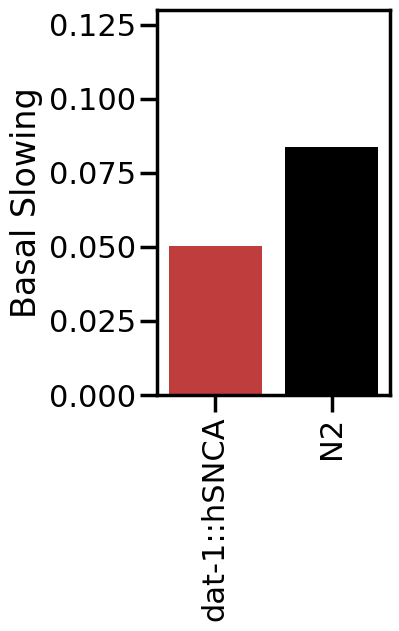

In [ ]:
Title = "Basal Slowing (Speed Off Food - Speed On Food), mm/s" #<---------------- Input Here -----------------
FileName = "LRRK2 BSR"
sns.set_context("poster")
plt.figure(linewidth = 1)
plt.figure(figsize=(3, 5))
plt.gca().xaxis.grid(False)
ax = sns.barplot(x="Genotype", 
                 y = 'speed', 
                 data = BSR_Data, #<--------------- Input Here -------------
             # color = 'CornflowerBlue',
                 hue = 'Genotype',
                 palette = [sns.color_palette()[3],'black'],
                #  palette = ['black',sns.color_palette()[0],sns.color_palette()[1]],
                 legend = False
             # edgecolor="DodgerBlue",
             # linewidth = 2.5,
#              seed=5,
#              ci = 95, # 'sd' for SD, '68' for SEM
#              palette = ['grey',
#                         'black'
#                        ]
                )
# sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.xlabel("")
plt.xticks(rotation=90)
plt.ylabel("Basal Slowing")
plt.ylim(top = 0.13)
# plt.ylim(bottom = -0.03)
plt.title("")
# plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.savefig(f'/Users/Joseph/Desktop/{FileName}.png', format='png', dpi=450, bbox_inches = 'tight')
plt.show()

# Stats Here

In [68]:
BSR_Data

,Group,Genotype,Treatment,plate_id,date,worm,time_bin,time,speed,x,y,angularspeed,pathlength,kink,bias,curve,dir,crab,length,midline,width,morphwidth,area
0,N2_OffFood,N2,OffFood,40154,20240719,25,336.0,335.501258,0.245395,37.044346,23.272003,13.914803,6.605704,50.992052,0.972155,39.869297,0.007257,0.028444,0.939793,1.216917,0.305492,0.135738,0.147547
1,N2_OffFood,N2,OffFood,40154,20240719,36,322.0,321.493852,0.200734,26.962151,47.312079,17.537243,10.244205,64.081827,0.287605,38.569931,0.007101,0.031187,0.852394,1.081147,0.288791,0.137864,0.126605
2,N2_OffFood,N2,OffFood,40154,20240719,42,378.5,378.006203,0.228473,22.277368,35.974185,20.002882,4.241047,55.149340,0.920882,36.899841,0.018032,0.027917,0.888361,1.144950,0.298375,0.126361,0.127636
3,N2_OffFood,N2,OffFood,40154,20240719,44,397.0,396.524982,0.184413,23.446122,38.335067,13.879478,-0.733685,68.792069,-0.683298,34.809800,0.007075,0.029776,0.790220,0.981565,0.267419,0.145313,0.125215
4,N2_OffFood,N2,OffFood,40154,20240719,45,368.5,367.998291,0.237649,34.785385,42.924100,15.419695,4.443233,42.640759,0.989474,35.097967,0.000598,0.029738,0.950478,1.125303,0.252053,0.123414,0.123110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,dat1-hSNCA(hSNCA)_OnFood,dat-1::hSNCA,OnFood,120347,20240719,630,392.5,392.018094,0.237920,42.967859,26.960003,24.572321,1.982640,50.627480,1.000000,35.894816,0.002000,0.038095,0.747072,0.965233,0.284149,0.109986,0.099075
1315,dat1-hSNCA(hSNCA)_OnFood,dat-1::hSNCA,OnFood,120347,20240719,636,395.0,394.524165,0.160218,22.822113,40.463838,27.858207,0.839443,75.245328,0.909091,32.062374,0.003874,0.016910,0.588239,0.767220,0.227141,0.095797,0.069295
1316,dat1-hSNCA(hSNCA)_OnFood,dat-1::hSNCA,OnFood,120347,20240719,637,307.0,306.494806,0.007395,29.974774,30.317465,1.388519,12.501000,50.594074,0.000000,26.293426,0.000000,0.002549,0.633073,0.764213,0.217450,0.082887,0.069991
1317,dat1-hSNCA(hSNCA)_OnFood,dat-1::hSNCA,OnFood,120347,20240719,638,395.5,395.010601,0.196648,31.355250,36.705996,29.177361,0.974688,69.760774,1.000000,34.957778,0.003963,0.026941,0.625342,0.828971,0.233807,0.101477,0.081250


In [ ]:
ListOfStrains = BSR_Data.Genotype.unique().tolist()
ListOfStrains.remove('N2')
print(ListOfStrains)

In [ ]:
InteractionTest = pd.DataFrame(columns=['Source','SS','DF','MS','F','p-unc','np2','Gene'])
for i in ListOfStrains:
    Comparison = ['N2', i]
    Comparisondata = BSR_Data[BSR_Data.Genotype.isin(Comparison)]
    result=Comparisondata.anova(dv="speed", between=["Genotype","Treatment"]).round(7)
    result['Gene']=i
    
    InteractionTest = pd.concat([result.to_frame().T, InteractionTest])

In [74]:
InteractionTest

,Source,SS,DF,MS,F,p-unc,np2,Gene
2,Genotype * Treatment,0.090975,1.0,0.090975,42.487746,0.0,0.031299,dat-1::hSNCA


In [75]:
name = "SNCA"
InteractionTest.to_csv(f"/Users/Joseph/Desktop/BSR_Screen/BSR_Interaction_Test_{name}.csv")